In [19]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.optimizers import Adam

In [20]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
((x_train.shape, y_train.shape), (x_test.shape, y_test.shape))

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (10000, 1)))

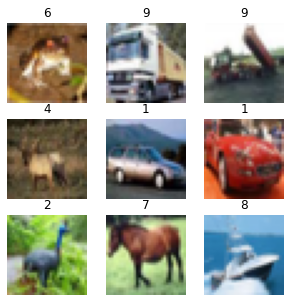

In [21]:
plt.figure(figsize=(5, 5))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.title(int(y_train[i]))
    plt.axis("off")

In [22]:
NUM_CLASSES = 10

In [23]:
# data comes in integers between 0 and 255 for each pixel channel
# convert to a range between –1 to 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train[0][0]

array([[0.23137255, 0.24313726, 0.24705882],
       [0.16862746, 0.18039216, 0.1764706 ],
       [0.19607843, 0.1882353 , 0.16862746],
       [0.26666668, 0.21176471, 0.16470589],
       [0.38431373, 0.28627452, 0.20392157],
       [0.46666667, 0.35686275, 0.24705882],
       [0.54509807, 0.41960785, 0.29411766],
       [0.5686275 , 0.43137255, 0.3137255 ],
       [0.58431375, 0.45882353, 0.34901962],
       [0.58431375, 0.47058824, 0.3647059 ],
       [0.5137255 , 0.40392157, 0.3019608 ],
       [0.49019608, 0.3882353 , 0.29803923],
       [0.5568628 , 0.4509804 , 0.35686275],
       [0.5647059 , 0.4392157 , 0.3372549 ],
       [0.5372549 , 0.4117647 , 0.30980393],
       [0.5058824 , 0.38039216, 0.2784314 ],
       [0.5372549 , 0.41568628, 0.30980393],
       [0.5254902 , 0.41568628, 0.29803923],
       [0.4862745 , 0.38039216, 0.2509804 ],
       [0.54509807, 0.44313726, 0.30588236],
       [0.54509807, 0.4392157 , 0.29411766],
       [0.52156866, 0.4117647 , 0.27058825],
       [0.

In [39]:
x_train.shape

(50000, 32, 32, 3)

In [24]:
# change the integer labeling of the images to one-hot-encoded vectors
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)
y_train[0][0]

0.0

In [25]:
(y_train.shape, y_test.shape)

((50000, 10), (10000, 10))

In [26]:
input_layer = Input(shape=(32,32, 3))
input_layer.shape

TensorShape([None, 32, 32, 3])

In [27]:
x = Flatten()(input_layer) # next dense layer expects flatten input
x.shape

TensorShape([None, 3072])

In [28]:
x = Dense(units=200, activation = 'relu')(x) # relu is zero if the input is < 0, otherwise it is the input
x.shape

TensorShape([None, 200])

In [29]:
x = Dense(units=150, activation = 'relu')(x)
x.shape

TensorShape([None, 150])

In [30]:
output_layer = Dense(units=10, activation = 'softmax')(x)
output_layer.shape

TensorShape([None, 10])

In [31]:
model = Model(input_layer, output_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 200)               614600    
                                                                 
 dense_4 (Dense)             (None, 150)               30150     
                                                                 
 dense_5 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [32]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/home/dev/.local/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [33]:
model.fit(
    x_train, # raw image data
    y_train, # hot encoded class labels
    batch_size=32, # how many observations (images) at each training step
                   # the larger the batch size, the more stable the gradient calculation, but the slower each training step
    epochs=10,
    shuffle=True, # batches should be randomly drawn from the training data
)

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8457 - accuracy: 0.3338
Epoch 2/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6582 - accuracy: 0.4069
Epoch 3/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5799 - accuracy: 0.4385
Epoch 4/10
1563/1563 [==============================] - 2s 2ms/step - loss: 1.5318 - accuracy: 0.4574
Epoch 5/10
1563/1563 [==============================] - 2s 2ms/step - loss: 1.4965 - accuracy: 0.4675
Epoch 6/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4679 - accuracy: 0.4777
Epoch 7/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4389 - accuracy: 0.4868
Epoch 8/10
1563/1563 [==============================] - 2s 2ms/step - loss: 1.4223 - accuracy: 0.4937
Epoch 9/10
1563/1563 [==============================] - 2s 2ms/step - loss: 1.3985 - accuracy: 0.5015
Epoch 10/10
1563/1563 [==============================] - 2s 2ms/step - loss: 1.383

In [35]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 1.4448 - accuracy: 0.4900


[1.4447699785232544, 0.49000000953674316]

In [37]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog' , 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 0s 1ms/step


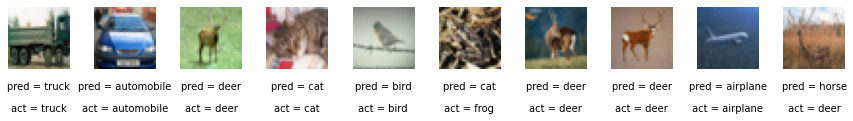

In [38]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10 , ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10 , ha='center', transform=ax.transAxes)
    ax.imshow(img)